In [2]:
from pytrends.request import TrendReq
import pandas as pd

# Cconexión con Google Trends
pytrends = TrendReq(hl='es-ES', tz=360)

# Lista de términos de búsqueda
search_terms = ["CrossFit", "HIIT", "Yoga", "Running", "Entrenamiento funcional"]

# Datos de interés temporal (últimos 5 años)
pytrends.build_payload(search_terms, cat=0, timeframe='today 5-y', geo='', gprop='')

# datos de tendencias
interest_over_time = pytrends.interest_over_time()

# Convertir tipos de datos 
interest_over_time = interest_over_time.infer_objects()

# Verificar datos descargados
print(interest_over_time.head())

# Guardar los datos en un archivo CSV
interest_over_time.to_csv('fitness_trends.csv', index=True)

print("Datos guardados en 'fitness_trends.csv'")



            CrossFit  HIIT  Yoga  Running  Entrenamiento funcional  isPartial
date                                                                         
2019-12-08        11     2    57       66                        0      False
2019-12-15        10     2    57       70                        0      False
2019-12-22        10     2    57       78                        0      False
2019-12-29        11     3    70       83                        0      False
2020-01-05        12     3    72       74                        0      False
Datos guardados en 'fitness_trends.csv'


c:\Users\Jesus\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


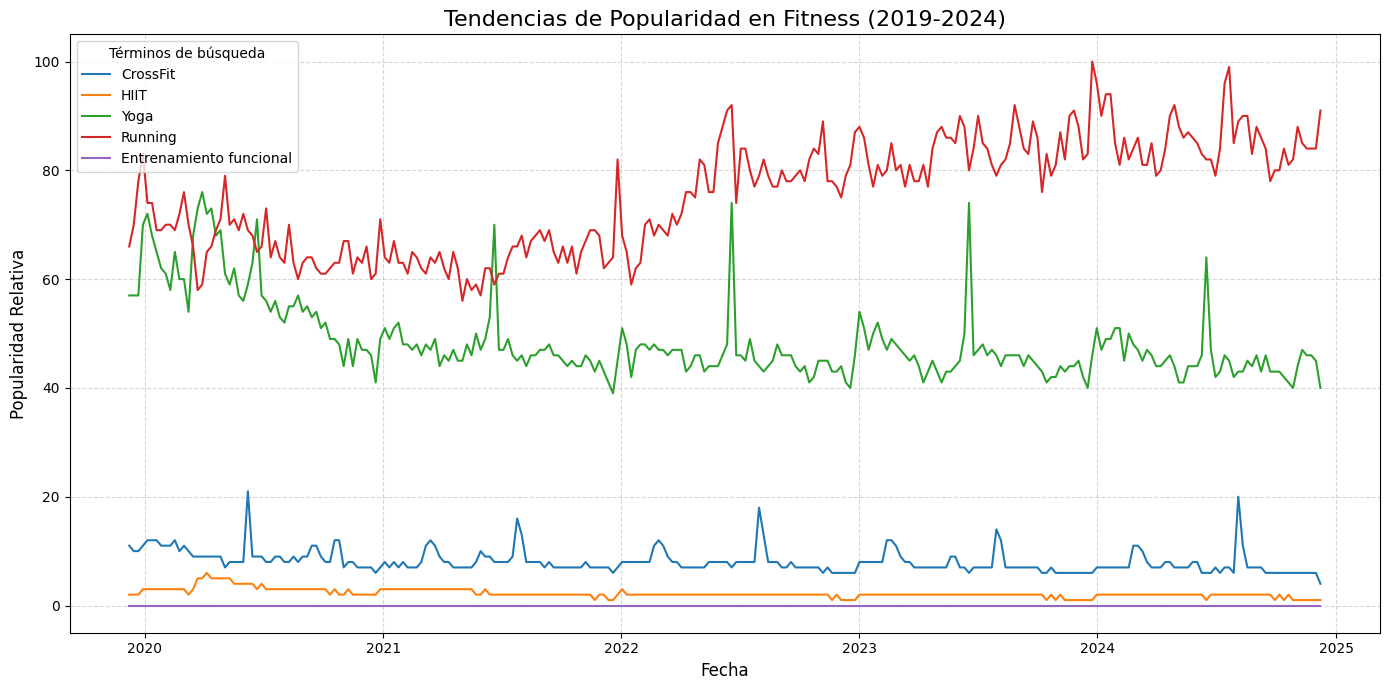

Estadísticas descriptivas:
                      date    CrossFit        HIIT        Yoga     Running  \
count                  262  262.000000  262.000000  262.000000  262.000000   
mean   2022-06-08 12:00:00    8.053435    2.232824   48.496183   75.328244   
min    2019-12-08 00:00:00    4.000000    1.000000   39.000000   56.000000   
25%    2021-03-08 18:00:00    7.000000    2.000000   44.000000   66.000000   
50%    2022-06-08 12:00:00    7.000000    2.000000   46.000000   77.000000   
75%    2023-09-08 06:00:00    8.000000    2.000000   49.000000   84.000000   
max    2024-12-08 00:00:00   21.000000    6.000000   76.000000  100.000000   
std                    NaN    2.136395    0.799420    7.284449   10.139595   

       Entrenamiento funcional  
count                    262.0  
mean                       0.0  
min                        0.0  
25%                        0.0  
50%                        0.0  
75%                        0.0  
max                        0.0  
std   

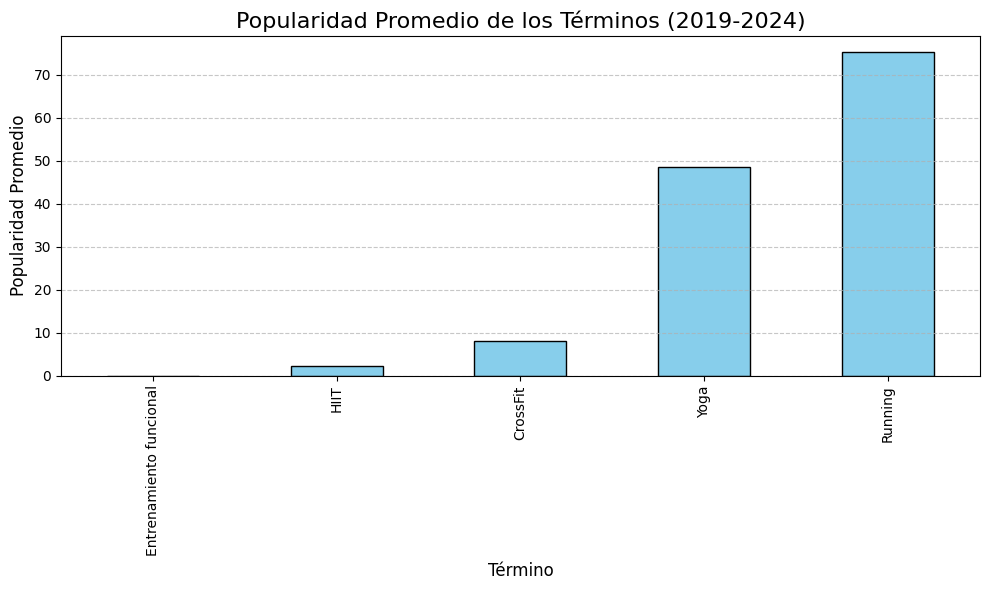

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = "fitness_trends.csv"  # Cambia esto si el archivo está en otra ubicación
fitness_trends_data = pd.read_csv(file_path)

# Convertir la columna 'date' al formato datetime
fitness_trends_data['date'] = pd.to_datetime(fitness_trends_data['date'])

# Graficar las tendencias temporales
plt.figure(figsize=(14, 7))
for column in fitness_trends_data.columns[1:-1]:  # Excluir 'date' e 'isPartial'
    plt.plot(fitness_trends_data['date'], fitness_trends_data[column], label=column)

# Configurar el gráfico
plt.title('Tendencias de Popularidad en Fitness (2019-2024)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Popularidad Relativa', fontsize=12)
plt.legend(title="Términos de búsqueda")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Análisis básico: Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(fitness_trends_data.describe())

# Verificar datos faltantes
print("\nDatos faltantes por columna:")
print(fitness_trends_data.isnull().sum())

# Comparativa de popularidad promedio por término
average_popularity = fitness_trends_data.iloc[:, 1:-1].mean()
print("\nPopularidad promedio de cada término:")
print(average_popularity)

# Graficar popularidad promedio
plt.figure(figsize=(10, 6))
average_popularity.sort_values().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Popularidad Promedio de los Términos (2019-2024)', fontsize=16)
plt.xlabel('Término', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [4]:
import pandas as pd

# Cargar el archivo
file_path = "fitness_trends.csv"  # Cambia la ruta si es necesario
fitness_trends = pd.read_csv(file_path)

# Convertir la columna 'date' al formato datetime
fitness_trends['date'] = pd.to_datetime(fitness_trends['date'])

# Verificar valores nulos
print("\nValores nulos antes de la limpieza:")
print(fitness_trends.isnull().sum())

# Eliminar la columna 'isPartial' porque no aporta información útil
fitness_trends = fitness_trends.drop(columns=['isPartial'])

# Verificar duplicados
if fitness_trends.duplicated().sum() > 0:
    print("\nEliminando filas duplicadas...")
    fitness_trends = fitness_trends.drop_duplicates()

# Revisar el dataset preprocesado
print("\nDatos después del preprocesado:")
print(fitness_trends.head())

# Guardar el dataset limpio en un nuevo archivo
cleaned_file_path = "cleaned_fitness_trends.csv"
fitness_trends.to_csv(cleaned_file_path, index=False)
print(f"\nArchivo limpio guardado como: {cleaned_file_path}")



Valores nulos antes de la limpieza:
date                       0
CrossFit                   0
HIIT                       0
Yoga                       0
Running                    0
Entrenamiento funcional    0
isPartial                  0
dtype: int64

Datos después del preprocesado:
        date  CrossFit  HIIT  Yoga  Running  Entrenamiento funcional
0 2019-12-08        11     2    57       66                        0
1 2019-12-15        10     2    57       70                        0
2 2019-12-22        10     2    57       78                        0
3 2019-12-29        11     3    70       83                        0
4 2020-01-05        12     3    72       74                        0

Archivo limpio guardado como: cleaned_fitness_trends.csv


In [5]:
import pandas as pd

# Cargar el archivo limpio
file_path = "fitness_trends.csv"  # Cambia la ruta si es necesario
fitness_trends = pd.read_csv(file_path)

# Convertir la columna 'date' al formato datetime
fitness_trends['date'] = pd.to_datetime(fitness_trends['date'])

# Verificar valores nulos
print("\nValores nulos antes de la limpieza:")
print(fitness_trends.isnull().sum())

# Eliminar la columna 'isPartial' porque no aporta información útil
if 'isPartial' in fitness_trends.columns:
    fitness_trends = fitness_trends.drop(columns=['isPartial'])

# Verificar y eliminar duplicados
if fitness_trends.duplicated().sum() > 0:
    print("\nEliminando filas duplicadas...")
    fitness_trends = fitness_trends.drop_duplicates()

# Añadir columnas de año y mes para análisis estacional
fitness_trends['year'] = fitness_trends['date'].dt.year
fitness_trends['month'] = fitness_trends['date'].dt.month

# Revisar datos después de la limpieza
print("\nDatos después de la limpieza:")
print(fitness_trends.head())

# Guardar el archivo limpio
cleaned_file_path = "cleaned_fitness_trends.csv"
fitness_trends.to_csv(cleaned_file_path, index=False)
print(f"\nArchivo limpio guardado como: {cleaned_file_path}")



Valores nulos antes de la limpieza:
date                       0
CrossFit                   0
HIIT                       0
Yoga                       0
Running                    0
Entrenamiento funcional    0
isPartial                  0
dtype: int64

Datos después de la limpieza:
        date  CrossFit  HIIT  Yoga  Running  Entrenamiento funcional  year  \
0 2019-12-08        11     2    57       66                        0  2019   
1 2019-12-15        10     2    57       70                        0  2019   
2 2019-12-22        10     2    57       78                        0  2019   
3 2019-12-29        11     3    70       83                        0  2019   
4 2020-01-05        12     3    72       74                        0  2020   

   month  
0     12  
1     12  
2     12  
3     12  
4      1  

Archivo limpio guardado como: cleaned_fitness_trends.csv



Estadísticas descriptivas:
                      date    CrossFit        HIIT        Yoga     Running  \
count                  262  262.000000  262.000000  262.000000  262.000000   
mean   2022-06-08 12:00:00    8.053435    2.232824   48.496183   75.328244   
min    2019-12-08 00:00:00    4.000000    1.000000   39.000000   56.000000   
25%    2021-03-08 18:00:00    7.000000    2.000000   44.000000   66.000000   
50%    2022-06-08 12:00:00    7.000000    2.000000   46.000000   77.000000   
75%    2023-09-08 06:00:00    8.000000    2.000000   49.000000   84.000000   
max    2024-12-08 00:00:00   21.000000    6.000000   76.000000  100.000000   
std                    NaN    2.136395    0.799420    7.284449   10.139595   

       Entrenamiento funcional         year       month  
count                    262.0   262.000000  262.000000  
mean                       0.0  2021.935115    6.526718  
min                        0.0  2019.000000    1.000000  
25%                        0.0  2021.

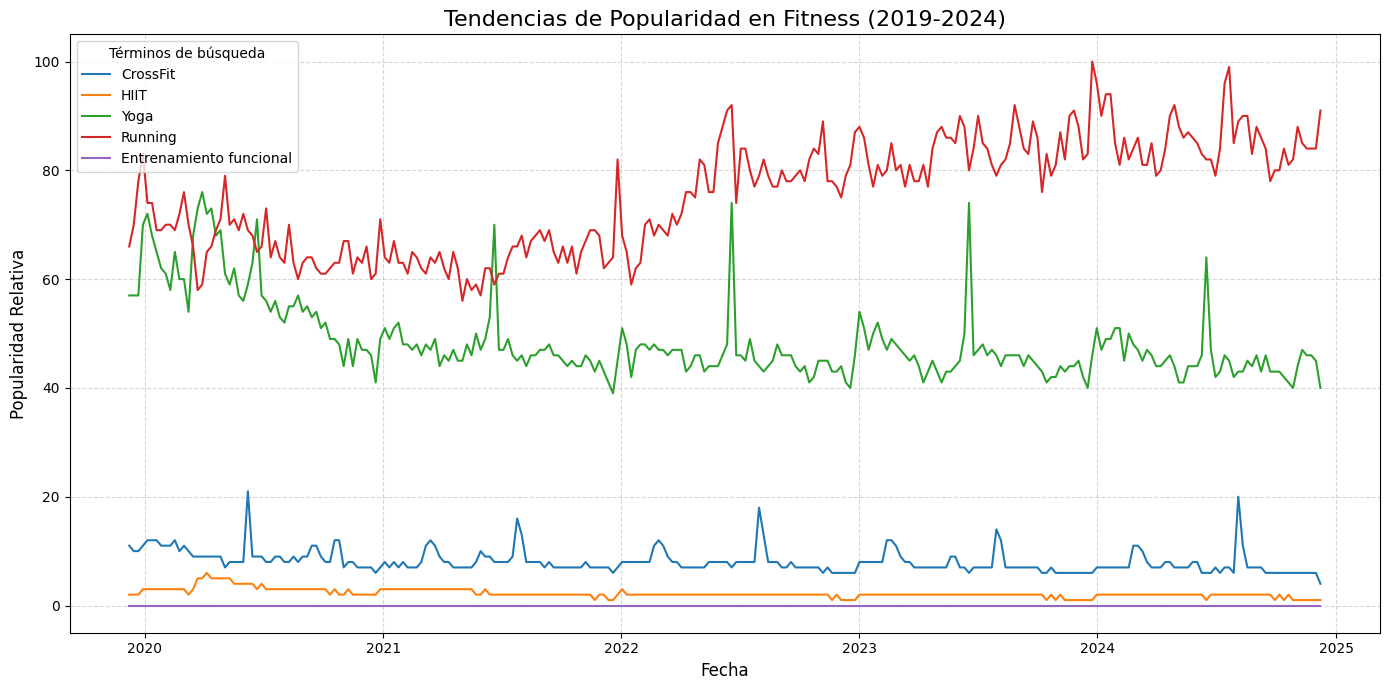

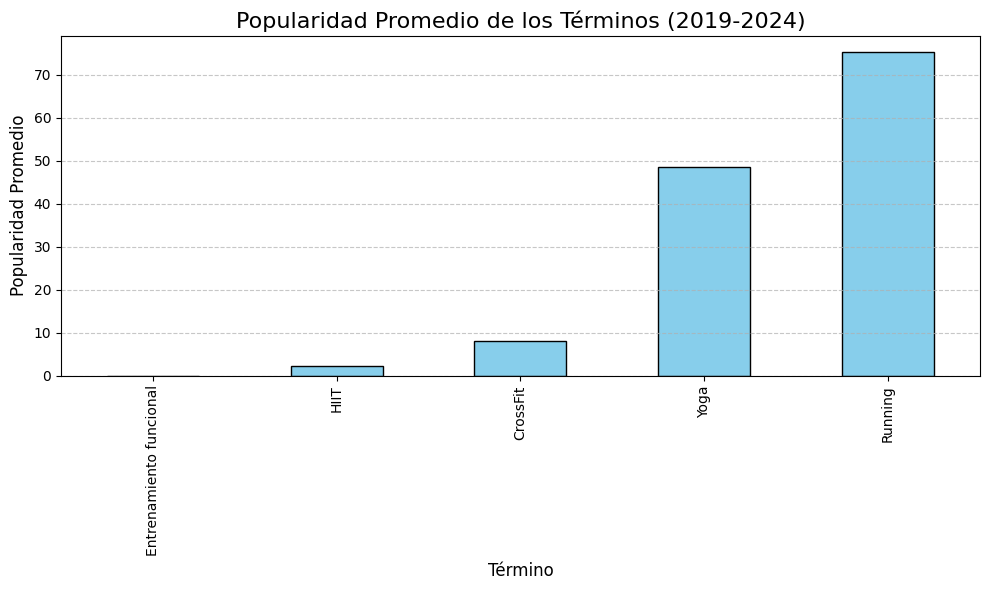

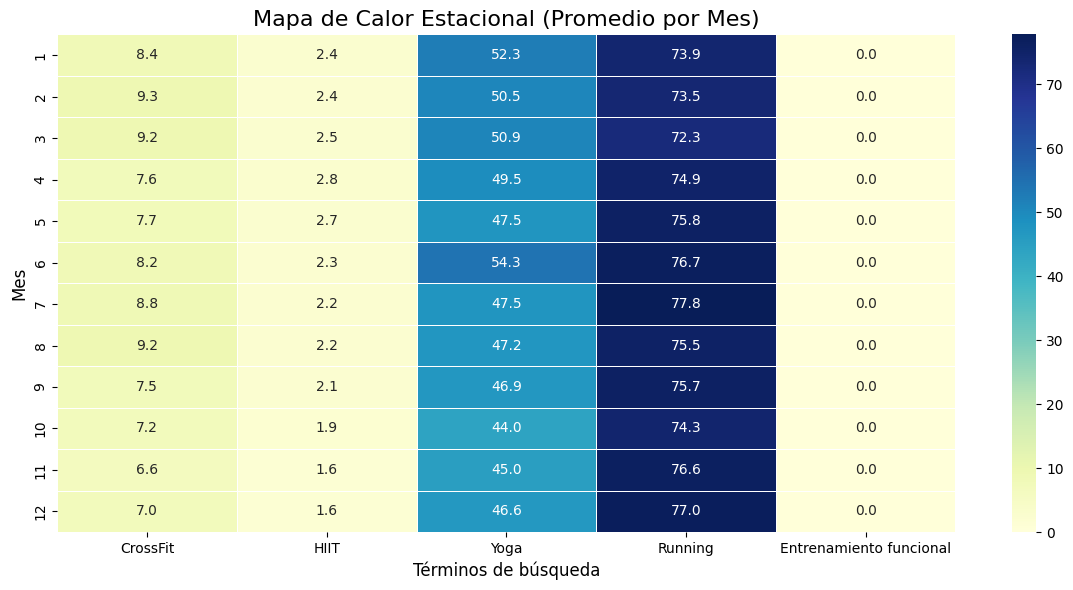

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo limpio
file_path = "cleaned_fitness_trends.csv"  # Cambia la ruta si es necesario
fitness_trends = pd.read_csv(file_path)

# Convertir la columna 'date' al formato datetime
fitness_trends['date'] = pd.to_datetime(fitness_trends['date'])

# Añadir columnas de año y mes para análisis estacional
fitness_trends['year'] = fitness_trends['date'].dt.year
fitness_trends['month'] = fitness_trends['date'].dt.month

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(fitness_trends.describe())

# Popularidad promedio de cada término
average_popularity = fitness_trends.iloc[:, 1:6].mean()
print("\nPopularidad promedio de cada término:")
print(average_popularity)

# Gráfico 1: Evolución temporal de cada término
plt.figure(figsize=(14, 7))
for column in fitness_trends.columns[1:6]:  # Columnas con términos de búsqueda
    plt.plot(fitness_trends['date'], fitness_trends[column], label=column)
plt.title('Tendencias de Popularidad en Fitness (2019-2024)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Popularidad Relativa', fontsize=12)
plt.legend(title="Términos de búsqueda")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Gráfico 2: Popularidad promedio de cada término
plt.figure(figsize=(10, 6))
average_popularity.sort_values().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Popularidad Promedio de los Términos (2019-2024)', fontsize=16)
plt.xlabel('Término', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análisis estacional: Promedio mensual
monthly_trends = fitness_trends.groupby('month').mean()

# Filtrar columnas numéricas para el mapa de calor
columns_to_include = ['CrossFit', 'HIIT', 'Yoga', 'Running', 'Entrenamiento funcional']
monthly_trends_filtered = monthly_trends[columns_to_include]

# Gráfico 3: Mapa de calor estacional
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_trends_filtered, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=0.5)
plt.title('Mapa de Calor Estacional (Promedio por Mes)', fontsize=16)
plt.xlabel('Términos de búsqueda', fontsize=12)
plt.ylabel('Mes', fontsize=12)
plt.tight_layout()
plt.show()



